<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 5 - Class 2 - 10/14</h1>
</div>

## Objectives for this week:
* Creating processes and algorithms
* Function declaration/Usage/Nesting
* Arguments and Keywords, Function scope
* Recursion

## Todays Agenda
* Homework Presentations
* More algorithms

In [ ]:
from IPython.lib.display import YouTubeVideo

In [ ]:
#%load_ext tutormagic

In [ ]:
#%%tutor --lang python3 --verticalStack -h 650 -k

# Exercise 3

Write a function that has an algorithm that is worst case 0(n).

# Exercise 4

Write a function called `summer` that takes an arbitrary number of keyword arguments and then adds any arguments that are ints/floats to produce a sum.

Hint:  
`summer(**{'a':True, 'b':1})` would return 1.   
`summer(**{'c':3, 'd':"4" })` would return 3.

# Bonus

Create a function that returns a lambda function. Show how it can be used to create new functions. Can you turn this into a decorator?

Hint: see example from `week-04-class-02.ipynb` with the `mytripler` function

In [ ]:
def decorator_function(func):
    def wrapper():
        func()
        print("completed")
    return wrapper

@decorator_function
def function_A():
    print("hello")
    
function_A()

# More on decorators:

How can we add an argumentto the decorator?

In [ ]:
def decorator_function(func):
    def wrapper():
        print("<a>")
        func()
        print("</a>")
    return wrapper

@decorator_function
def function_A():
    print("hello")
    
function_A()

In [1]:
def decorator_function(func):
    def wrapper(name):   #decorator w argument
        print(f"<a>{func(name)}</a>")
    return wrapper
    
@decorator_function
def function_A(name):
    return name
    
function_A("this is inner content for html")

<a>this is inner content for html</a>


In [2]:
def tagger(*tag_name):
    def decorator_function(func):
        def wrapper(name):
            print(f"<{tag_name[0]}>{func(name)}</{tag_name[0]}>")
        return wrapper
    return decorator_function

@tagger('h1','div', 'b')
def function_A(name):
    return name

function_A("inner content")

<('h1', 'div', 'b')>inner content</('h1', 'div', 'b')>


# More Recursion

Using recursion, how can we show if a number is prime?

In [5]:
#%%tutor --lang python3 --verticalStack -h 650
def is_prime(n, i=2):
    n = abs(n)
    if n == 0 or n == 1:
        return False
    if n == 2:        
        return True
    if n % i == 0:
        return False
    if (i * i > n):
        return True
    return is_prime(n, i + 1)

print(is_prime(19))
  

True


In [6]:
for i in [9,12,28,51,110,256,930]:
    print(i, is_prime(i))

9 False
12 False
28 False
51 False
110 False
256 False
930 False


In [7]:
for i in [19,109,457,601,1453,2203,3637,5003,6397,7919]:
    print(i, is_prime(i))

19 True
109 True
457 True
601 True
1453 True
2203 True
3637 True
5003 True
6397 True
7919 True


## Big O Notation

[Video on Big-O Notation](https://www.youtube.com/watch?v=__vX2sjlpXU)

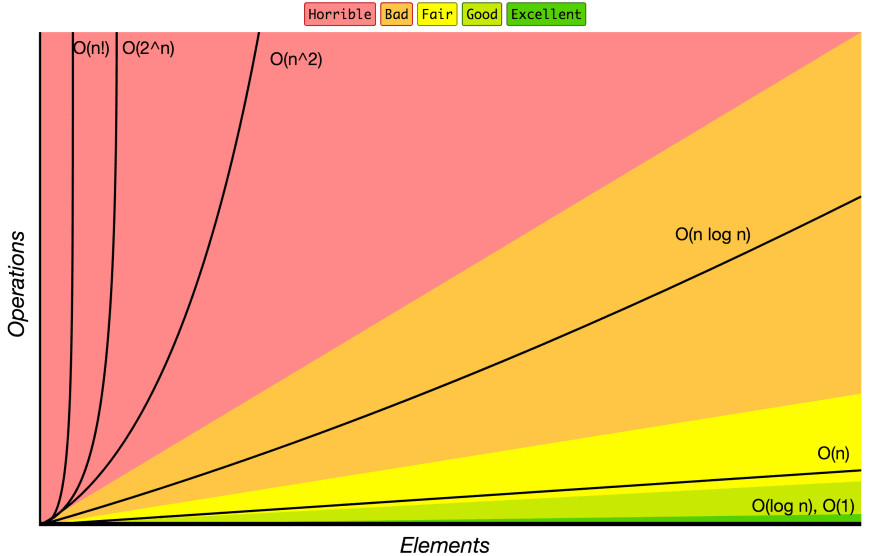

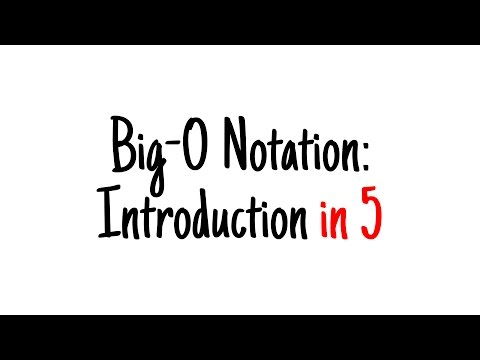

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('__vX2sjlpXU', width=600)

In [ ]:
def func(lst):
    for i in lst:
        #it will loop through each element = n
        for j in lst:
        # it will loop thorugh each element = n
        
#         n*n  == n^2
        
len(lst) == 100
            

# O(1)

O(1) means the algorithm runs in constant time relative to it's input. No matter how big the list we input, it takes the same amount of time to return the value it does.

In [9]:
#is not whar you are doing is how many times you
#are doing it

#1 example
def hello(): #no inputs so it will almost always run
    #around the same time 
    print("hello")  
    
#2 example
def adder(x,y):
    return(x+y) #same operation will be contant

#3 example
#you are just printing the value as it goes in
def stdfs():
    for i in range(10): #because its always going to
        #be range(10) == constant
        print(i)


# O(n)

O(n) means the algorithm will run in linear time relative to it's input. Meaning an input with n values would require the same n operations to complete. Meaning 5 inputs will require 5 steps. 100 inputs, 100 steps.

In [ ]:
#it's O(n) because we don't know how big n will be
def hsgd(n):  
    for i in range(n):
        print(i)

# O(log n)

$$ log_3 9 = 2$$

$$ log_5 25 = 2$$

O(log n) means that the algorithm runs in logarithmic time. This means that as the inputs rises, the amount of time that the algorithm takes to run does not increase linearly (see O(n)). It essentially halves as input increases.

## How can we find a value in a sorted list:

In [ ]:
lst = [0,1,2,3,4,5,6,7,8,9,10]

# this is considered a linear search:
def find(num, lst):
    loops = 0
    for index, val in enumerate(lst):
        loops += 1
        if val == num:
            return loops, index
    else:
        return loops, -1
            
find(9, lst)

### What is a better way?

Binary search. It is O(log n) in the worst case.

The thinking behind binary search is in these steps:
1. Binary search begins by comparing the middle element of the array with the target value.
2. If the target value matches the middle element, its position in the array is returned.
3. If the target value is less than the middle element, the search continues in the lower half of the array.
4. If the target value is greater than the middle element, the search continues in the upper half of the array. By doing this, the algorithm eliminates the half in which the target value cannot lie in each iteration

Pseudocode:  
    1. Set L to 0 and R to n-1  
    2. If L > R search is Unsuccessful  
    3. Set m to the floor of ((L+R) / 2),  
    4. If A[m] < T, set L = m + 1, and goto step 2.  
    5. If A[m] > T, set R = m – 1, and goto step 2.  
    6. If A[m] == T, Search is done, return m  

In [ ]:
#%%tutor --lang python3
lst = [0,1,2,3,4,5,6,7,8,9,10]

#it will increase but more gradually
def binary_search(search, lst):
    length = len(lst)
    left = 0
    right = length - 1
    loops = 0
    
    while left <= right:
        loops += 1
        mid = (left+right) // 2
        if lst[mid] < search:
            left = mid + 1
        elif lst[mid] > search:
            right = mid - 1
        else:
            return loops, mid
    return loops, -1

In [ ]:
binary_search(9, lst)

# Sorting algorithms

Notice how the previous searching algorithm (binary search) only worked on sorted list. What sort of algorithms exist for sorting data structures?

Sorting Algorithms:
* Insertion Sort
* Selection Sort
* Bubble Sort
* Merge Sort
* Quick Sort


# Insertion Sort

Algorithm:

1. Assume that the first element in the list is in the sorted section of the list and remaining all elements are in the unsorted section.
2. Consider the first element from the unsorted list and insert that element into the sorted list in the order specified (ascending or descending)
3. Repeat the above steps until all the elements from the unsorted list are moved to the sorted list.

Best case: `O(n)`  
Worst case: `O(n²)`  
Average case: `O(n²)`

https://www.youtube.com/watch?v=8oJS1BMKE64

https://www.youtube.com/watch?v=JU767SDMDvA

In [ ]:
YouTubeVideo('JU767SDMDvA', width=600)

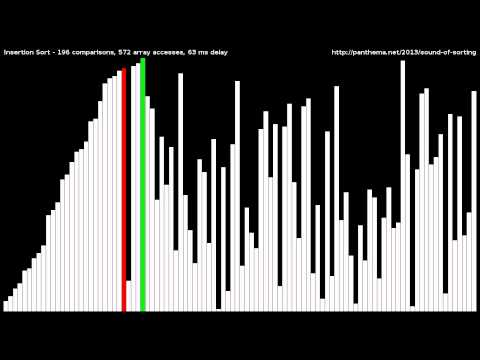

In [10]:
YouTubeVideo('8oJS1BMKE64', width=600) #green line
#separates the sorted side from the unsorted side

In [ ]:
# This function takes unsorted array as an input 
# and returns sorted array.
def insertion_sort(arr):
    #loop over all the elements in the list 
    for i in range(1, len(arr)): 
   
        val = arr[i]
   
        # move elements of list [0..i-1], that are 
        # greater than val, to one position ahead 
        # of the current position 
        j = i-1
        while j >=0 and val < arr[j] : 
            arr[j+1] = arr[j] 
            j -= 1
        arr[j+1] = val
     
    return arr
 
#given array
arr = [74, 14, 13, 42, 7]
 
sorted_arr = insertion_sort(arr)
print(sorted_arr)

# Selection Sort

Algorithm:
1. Take the first element of the list
2. Compare the first element with all other elements in the list.
3. While comparing if any element is smaller than the selected element (ascending order), then these two are swapped.
4. Repeat the same process with all the positions in the list until the entire list is sorted.

Best case: `O(n²)` comparisons, `O(1)` swaps   
Worst case: `O(n²)` comparisons, `O(n)` swaps    
Average case: `O(n²)` comparisons, `O(n)`swaps

https://www.youtube.com/watch?v=92BfuxHn2XE

https://www.youtube.com/watch?v=g-PGLbMth_g

In [ ]:
YouTubeVideo('g-PGLbMth_g', width=600)

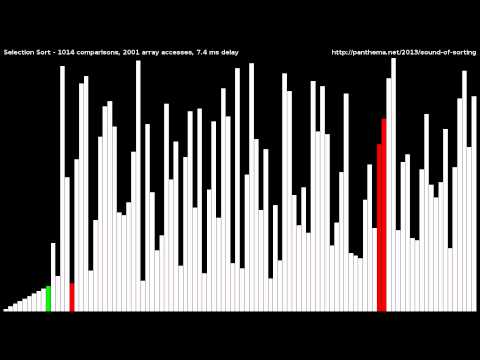

In [11]:
YouTubeVideo('92BfuxHn2XE', width=600)

In [ ]:
#swap two elements in nArr at postion i and j
def swap(i, j, nArr):
    if i!=j:     
        temp = nArr[j]
        nArr[j] = nArr[i]
        nArr[i] = temp
 
#function to sort elements in the list
def selectionSort(nArr):    
    for i in range(0, len(nArr)):
        small = i
        for j in range(i+1, len(nArr)):
            if nArr[j] < nArr[small]:
                small = j
        swap(i, small, nArr)
 
#list containing elements to sort        
nArr = [34,456, 5, 5,67]
selectionSort(nArr)
print(nArr)

# Bubble Sort

Algorithm:

1. Take the array as input
2. For each element (say x) in the array:
         1. For each adjacent element (say y) to x in the array
            Compare element x with y.
         2. Swap if it is not in order


Best case: `O(n)`  
Worst case: `O(n log n)`  
Average case: `O(n log n)`

https://www.youtube.com/watch?v=Cq7SMsQBEUw

https://www.youtube.com/watch?v=xli_FI7CuzA

In [ ]:
YouTubeVideo('xli_FI7CuzA', width=600)

In [ ]:
YouTubeVideo('Cq7SMsQBEUw', width=600)

In [ ]:
def bubbleSort(arr): 
    n = len(arr) 
  
    # Traverse through all array elements 
    for i in range(n-1): 
    # range(n) also work but outer loop will repeat one time more than needed. 
  
        # Last i elements are already in place 
        for j in range(0, n-i-1): 
  
            # traverse the array from 0 to n-i-1 
            # Swap if the element found is greater 
            # than the next element 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
  
# Driver code to test above 
arr = [64, 34, 25, 12, 22, 11, 90] 
  
bubbleSort(arr) 
  
print(f"Sorted array is: {arr}") 

# Merge Sort

Algorithm:
1. Divide the list recursively into two or more sub-problems until it can no more be divided
2. Solve the sub-problems until it is reached to the base case
3. Merge the smaller lists into the new list in sorted order

Best case: `O(n log n)`  
Worst case: `O(n log n)`  
Average case: `O(n log n)`

https://www.youtube.com/watch?v=ZRPoEKHXTJg

https://www.youtube.com/watch?v=4VqmGXwpLqc

In [ ]:
YouTubeVideo('4VqmGXwpLqc', width=600)

In [ ]:
YouTubeVideo('ZRPoEKHXTJg', width=600)

In [ ]:
def merge_sort(inp_arr):
    size = len(inp_arr)
    if size > 1:
        middle = size // 2
        left_arr = inp_arr[:middle]
        right_arr = inp_arr[middle:]
 
        merge_sort(left_arr)
        merge_sort(right_arr)
 
        p = 0
        q = 0
        r = 0
 
        left_size = len(left_arr)
        right_size = len(right_arr)
        while p < left_size and q < right_size:
            if left_arr[p] < right_arr[q]:
              inp_arr[r] = left_arr[p]
              p += 1
            else:
                inp_arr[r] = right_arr[q]
                q += 1
             
            r += 1
 
        
        while p < left_size:
            inp_arr[r] = left_arr[p]
            p += 1
            r += 1
 
        while q < right_size:
            inp_arr[r]=right_arr[q]
            q += 1
            r += 1
 
inp_arr = [11, 31, 7, 41, 101, 56, 77, 2]
print("Input Array:\n")
print(inp_arr)
merge_sort(inp_arr)
print("Sorted Array:\n")
print(inp_arr)

# Quick Sort

Algorithm:

1. Divide the list by any chosen element and call it a Pivot element. Rearrange the elements, all the elements that are less than equal to the pivot element must be in left and larger ones on the right. This procedure is called Partitioning.
2. Conquer which mean recursively ordering the subarrays
3. There is nothing left in the combined stage as the conquer stage organizes everything. The smaller or equal elements to the pivot are organized at the left side and larger elements are organized at the right.



Best case: `O(n log n)`  
Worst case: `O(n²)`  
Average case: `O(n log n)`

https://www.youtube.com/watch?v=8hEyhs3OV1w

https://www.youtube.com/watch?v=Hoixgm4-P4M

In [ ]:
YouTubeVideo('Hoixgm4-P4M', width=600)

In [ ]:
YouTubeVideo('8hEyhs3OV1w', width=600)

In [ ]:
# Python program for implementation of Quicksort Sort
 
# This function takes last element as pivot, places
# the pivot element at its correct position in sorted
# array, and places all smaller (smaller than pivot)
# to left of pivot and all greater elements to right
# of pivot
 
 
def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
 
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
 
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
 
# The main function that implements QuickSort
# arr[] --> Array to be sorted,
# low  --> Starting index,
# high  --> Ending index
 
# Function to do Quick sort
 
 
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
 
 
# Driver code to test above
arr = [10, 7, 8, 9, 1, 5]
n = len(arr)
quickSort(arr, 0, n-1)
print(f"Sorted array is: {arr}")


# Timsort  - Python uses it

Based on merge sort and insertion sort.  
[Timsort wiki](https://en.wikipedia.org/wiki/Timsort)

The sorting algorithm python uses for `sorted()` and `lst.sort()`

Best case: `O(n)`  
Worst case: `O(n log n)`  
Average case: `O(n log n)`

https://www.youtube.com/watch?v=NVIjHj-lrT4

In [ ]:
YouTubeVideo('NVIjHj-lrT4', width=600)

In [ ]:
minrun = 32

def InsSort(arr,start,end):    
    for i in range(start+1,end+1):
        elem = arr[i]
        j = i-1
        while j>=start and elem<arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = elem
    return arr

def merge(arr,start,mid,end):
    if mid==end:
        return arr
    first = arr[start:mid+1]
    last = arr[mid+1:end+1]
    len1 = mid-start+1
    len2 = end-mid
    ind1 = 0
    ind2 = 0
    ind  = start
     
    while ind1<len1 and ind2<len2:
        if first[ind1]<last[ind2]:
            arr[ind] = first[ind1]
            ind1 += 1
        else:
            arr[ind] = last[ind2]
            ind2 += 1
        ind += 1
     
    while ind1<len1:
        arr[ind] = first[ind1]
        ind1 += 1
        ind += 1
              
    while ind2<len2:
        arr[ind] = last[ind2]
        ind2 += 1
        ind += 1   
              
    return arr
            

def TimSort(arr):
    n = len(arr)
    
    for start in range(0,n,minrun):
        end = min(start+minrun-1,n-1)
        arr = InsSort(arr,start,end)
        
    curr_size = minrun
    while curr_size<n:    
        for start in range(0,n,curr_size*2):
            mid = min(n-1,start+curr_size-1)
            end = min(n-1,mid+curr_size)
            arr = merge(arr,start,mid,end)
        curr_size *= 2
    return arr

arr = [10, 7, 8, 9, 1, 5]
new_arr = TimSort(arr)
print(new_arr)